# Linear Regression (Multiple Variables) with scaling

## Function
In here we have multiple features so $w$ is a vector and is written as $\overrightarrow{w}$
and $x$ is also a vector written as $\overrightarrow{x}$. $b$ is the same number (bias) and we write the function as<br>
$f_{\overrightarrow{w},b}(\overrightarrow{x}) = \overrightarrow{w}.\overrightarrow{x} + b$<br>
which is its vectorized form; without vectorization it will be like <br>
$f_{w, b}(x) = w_1x_1 + w_2x_2 + . . . + w_nx_n + b$ <br>
The result of the dot product is the same<br>
$\overrightarrow{w}.\overrightarrow{x} = w_1x_1 + w_2x_2 + . . . + w_nx_n$

Let's use the same example of price of the houses but this time with multiple features; other than predicting the price via its size, we'll have number of bedrooms, age of the house, number of bathrooms.

In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [2]:
# Our dataset
x_train = np.array([[1275, 4, 1, 12], [1674, 5, 2, 6], [2000, 6, 3, 1], [987, 2, 1, 34], [1275, 4, 1, 4]], dtype='float64')
y_train = np.array([452.983, 673.983, 983.992, 122.111, 555.211], dtype='float64')
m, n = x_train.shape # m is the number of data and n is the number of features
w = np.random.random(n) # initial value for w
b = 100 # initial value for b

In [3]:
df = pd.DataFrame(x_train, columns=['Size (feet squared)', 'Number of bedrooms', 'Number of bathrooms', 'Age'])
df['Price(1k $)'] = pd.Series(y_train)
df

,Size (feet squared),Number of bedrooms,Number of bathrooms,Age,Price(1k $)
0,1275.0,4.0,1.0,12.0,452.983
1,1674.0,5.0,2.0,6.0,673.983
2,2000.0,6.0,3.0,1.0,983.992
3,987.0,2.0,1.0,34.0,122.111
4,1275.0,4.0,1.0,4.0,555.211


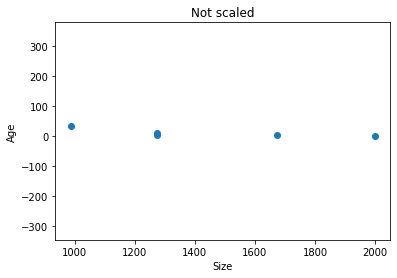

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x_train[:,0], x_train[:,3]);
ax.axis('equal');
ax.set_title("Not scaled");
ax.set_xlabel('Size');
ax.set_ylabel('Age');

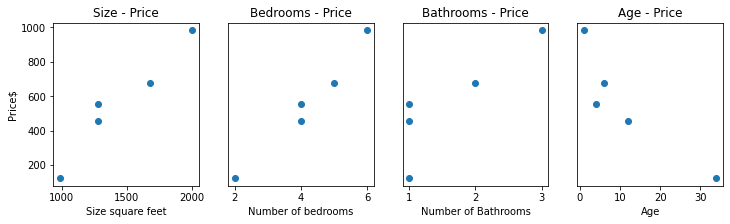

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].scatter(x_train[:, 0], y_train)
ax[0].set_title('Size - Price')
ax[0].set_xlabel('Size square feet')
ax[0].set_ylabel('Price$')

ax[1].tick_params(labelleft=False, left=False)
ax[1].scatter(x_train[:, 1], y_train)
ax[1].set_title('Bedrooms - Price')
ax[1].set_xlabel('Number of bedrooms')

ax[2].tick_params(labelleft=False, left=False)
ax[2].scatter(x_train[:, 2], y_train)
ax[2].set_title('Bathrooms - Price')
ax[2].set_xlabel('Number of Bathrooms')

ax[3].tick_params(labelleft=False, left=False)
ax[3].scatter(x_train[:, 3], y_train)
ax[3].set_title('Age - Price')
ax[3].set_xlabel('Age');

Now let's use Z-normalization to scale our data to better train our model. Below, function is define to scale our dataset data.

In [6]:
def z_normal(x):
    std = x.std()
    mean = x.mean()
    x_temp = copy.deepcopy(x).T
    m, n = x_temp.shape
    for i in range(m):
        std = x_temp[i].std()
        x_temp[i] = x_temp[i] - x_temp[i].mean()
        x_temp[i] =  x_temp[i] / std
    return x_temp.T

After normalization, let's see how scaled Size and age are

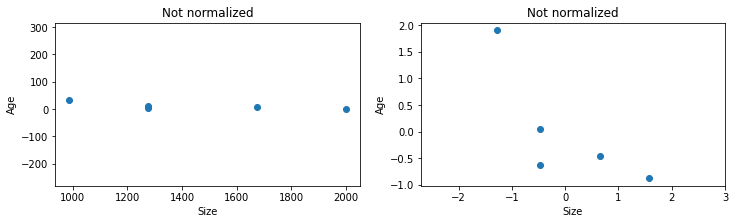

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].axis('equal');
ax[0].scatter(x_train[:, 0], x_train[:, 3]);
ax[0].set_title("Not normalized");
ax[0].set_xlabel('Size');
ax[0].set_ylabel('Age');

x_train_norm = z_normal(x_train)
ax[1].axis('equal');
ax[1].scatter(x_train_norm[:, 0], x_train_norm[:, 3]);
ax[1].set_title("Not normalized");
ax[1].set_xlabel('Size');
ax[1].set_ylabel('Age');

In [8]:
def predict(x, w, b):
    return np.dot(w, x) + b

Now let's try to predict the value of the first house in the dataset; 

In [9]:
print(f'Value for a house with size=1275 and numberOfBedrooms=4 and numberOfBathrooms=1 and age=12 is {predict(x_train[0], w, b):.3f}k$')
print(f'The actual price is {y_train[0]}k$')

Value for a house with size=1275 and numberOfBedrooms=4 and numberOfBathrooms=1 and age=12 is 264.885k$
The actual price is 452.983k$


## Cost function
Now that we use vectorization, cost function is defined as <br>
$J(\overrightarrow{w}, b) = \frac{1}{2m}\Sigma_{i=1}^{m}(f_{\overrightarrow{x},b}(\overrightarrow{x}^{(i)}) - y^{(i)})^2$

In [10]:
def cost(x, y, w, b):
    err_sum = 0
    m = x.shape[0]
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        err_sum += (f_wb - y[i]) ** 2
    err_sum = err_sum / (2 * m)
    return err_sum

If we run the cost function now due to our last test for predicting the price of the first house, we anticipate a large number


In [11]:
print(cost(x_train, y_train, w, b))

66975.80974998191


## Gradient Descent
Now since we have multiple features, we should find the derivative of each of the features. So, we have to find a good value for each of $w$s from $w_1$ to $w_n$
So we have to find the derivative for each of the features
$w_i = w_i - \alpha\frac{d}{dm}J(\overrightarrow{w}, b)$ and $b = b - \alpha\frac{d}{db}J(\overrightarrow{w}, b)$<br>
for each of the $w$s we have<br>
$w_j = w_j - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(f_{\overrightarrow{w},b}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$<br>
$b = b - \alpha\frac{1}{m}\Sigma_{i=1}^{m}(f_{\overrightarrow{w},b}(x^{(i)})-y^{(i)})$

In [12]:
def gradient(x, y, w, b):
    m, n = x.shape
    w_t = np.zeros((n,))
    b_t = 0
    for i in range(m):
        err = np.dot(w, x[i]) + b - y[i]
        for j in range(n):
            w_t[j] += err * x[i, j]
        b_t += err
    w_t = w_t / m
    b_t = b_t / m
    return w_t, b_t

In [13]:
def gradient_descent(x, y, init_w, init_b, alpha, cost_function, gradient_function, iterations=1000):
    hist = []
    w = copy.deepcopy(init_w)
    b = init_b
    for i in range(1, iterations + 1):
        w_t, b_t = gradient_function(x, y, w, b)
        w = w - (alpha * w_t)
        b = b - (alpha * b_t)
        c_cost = cost_function(x, y, w, b)
        hist.append([i, c_cost])
        if i % 100 == 0:
            print(f'w={w}, b={b}, cost={c_cost}')
    return w, b, hist

In [14]:
x_train_norm = z_normal(x_train)
w, b, hist = gradient_descent(x_train_norm, y_train, w, b, 0.5, cost, gradient, 10000)

w=[  28.78046652   40.55910213  106.67148459 -133.60874768], b=557.656, cost=238.9534893890684
w=[  -3.47136201   25.77445205  138.18458581 -154.8038827 ], b=557.656, cost=183.5311112090224
w=[ -29.83635855   24.99361894  158.55724902 -164.7438053 ], b=557.656, cost=158.99752410241285
w=[ -52.82217434   30.84675517  173.20449404 -169.14066695], b=557.656, cost=142.98471363197004
w=[ -73.69020754   39.70145375  184.81454406 -170.8189387 ], b=557.656, cost=129.93504373672363
w=[ -93.08444504   49.77347617  194.72635522 -171.17472353], b=557.656, cost=118.41157931874984
w=[-111.34256711   60.19223341  203.61104359 -170.89761625], b=557.656, cost=107.99242969943107
w=[-128.64987835   70.53854286  211.8089777  -170.32777588], b=557.656, cost=98.51023994759089
w=[-145.11548962   80.61599984  219.49654206 -169.63255274], b=557.656, cost=89.86556279104698
w=[-160.81003882   90.33790751  226.76864524 -168.89385668], b=557.656, cost=81.98069944756732
w=[-175.78438507   99.67136778  233.67954926 

Let's now predict the value of the house like before

In [15]:
print(f'Value for a house with size=1275 and numberOfBedrooms=4 and numberOfBathrooms=1 and age=12 is {predict(x_train_norm[0], w, b):.3f}k$')
print(f'The actual price is {y_train[0]}k$')

Value for a house with size=1275 and numberOfBedrooms=4 and numberOfBathrooms=1 and age=12 is 452.795k$
The actual price is 452.983k$


In [16]:
predicted_values = []
for i in range(m):
    predicted_values.append(predict(x_train_norm[i], w, b))
df['Prediction (1k $)'] = pd.Series(predicted_values)
df

,Size (feet squared),Number of bedrooms,Number of bathrooms,Age,Price(1k $),Prediction (1k $)
0,1275.0,4.0,1.0,12.0,452.983,452.794788
1,1674.0,5.0,2.0,6.0,673.983,674.356073
2,2000.0,6.0,3.0,1.0,983.992,983.800950
3,987.0,2.0,1.0,34.0,122.111,122.116706
4,1275.0,4.0,1.0,4.0,555.211,555.211483


Let's take a look at our learning curve

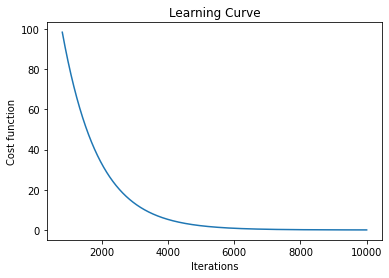

In [17]:
fig = plt.figure()
hist = np.array(hist)
plt.plot(hist[800:10000, 0], hist[800:10000, 1]);
plt.title('Learning Curve');
plt.xlabel('Iterations');
plt.ylabel('Cost function');

Scaling helps us to better train our data and much more faster